# Import Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [30]:
df = pd.read_csv("../data/AmesHousing.csv")

In [31]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [32]:
df.shape

(2930, 82)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

## Check NA values

In [34]:
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [35]:
## Create series where missing values are greater than 0
missing = df.isnull().sum()
missing = missing[missing > 0]

In [36]:
missing

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [47]:
# Find and numeric columns and their null values sum
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_nulls = df[numeric_cols].isnull().sum()
numeric_nulls = numeric_nulls[numeric_nulls > 0]
# Find and categorical columns
categorical_cols = df.select_dtypes(include=[object]).columns.tolist()
categorical_nulls = df[categorical_cols].isnull().sum()
categorical_nulls = categorical_nulls[categorical_nulls > 0]

In [48]:
numeric_nulls

BsmtFin SF 1      1
BsmtFin SF 2      1
Bsmt Unf SF       1
Total Bsmt SF     1
Bsmt Full Bath    2
Bsmt Half Bath    2
Garage Cars       1
Garage Area       1
dtype: int64

In [39]:
categorical_nulls

Alley             2732
Mas Vnr Type      1775
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Electrical           1
Fireplace Qu      1422
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [40]:
df["Lot Frontage"].fillna(df["Lot Frontage"].median(), inplace=True)

In [45]:
df["Garage Yr Blt"].fillna(df["Garage Yr Blt"].median(), inplace=True)

In [46]:
df["Mas Vnr Area"].fillna(df["Mas Vnr Area"].median(), inplace=True)

In [51]:
# Filter categorical columns with null values where their null count is greater than 20% of the total rows
threshold = 0.2 * len(df)
categorical_nulls_filtered = categorical_nulls[categorical_nulls < threshold]

In [52]:
categorical_nulls_filtered

Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin Type 2     81
Electrical          1
Garage Type       157
Garage Finish     159
Garage Qual       159
Garage Cond       159
dtype: int64

In [53]:
# Fill categorical columns with mode
for col in categorical_nulls_filtered.index:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [59]:
missing = df.isnull().sum()[df.isnull().sum() > threshold].index.tolist()

In [60]:
df.drop(columns=missing, inplace=True)

In [62]:
df.isnull().sum()[df.isnull().sum() > 0]

BsmtFin SF 1      1
BsmtFin SF 2      1
Bsmt Unf SF       1
Total Bsmt SF     1
Bsmt Full Bath    2
Bsmt Half Bath    2
Garage Cars       1
Garage Area       1
dtype: int64

In [63]:
df.dropna(inplace=True)

In [64]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

## EDA

In [69]:
df.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False)

Neighborhood
NoRidge    330319.126761
StoneBr    324229.196078
NridgHt    322018.265060
GrnHill    280000.000000
Veenker    248314.583333
Timber     246599.541667
Somerst    229707.324176
ClearCr    208662.090909
Crawfor    207550.834951
CollgCr    201803.434457
Blmngtn    196661.678571
Greens     193531.250000
Gilbert    190646.575758
NWAmes     188406.908397
SawyerW    184070.184000
Mitchel    162226.631579
NAmes      145097.349887
Blueste    143590.000000
NPkVill    140710.869565
Landmrk    137000.000000
Sawyer     136751.152318
SWISU      135071.937500
Edwards    130046.196891
BrkSide    125183.878505
OldTown    123991.891213
BrDale     105608.333333
IDOTRR     103240.336957
MeadowV     95756.486486
Name: SalePrice, dtype: float64

In [70]:
df.groupby("House Style")["SalePrice"].mean().sort_values(ascending=False)

House Style
2.5Fin    220000.000000
2Story    207054.472477
1Story    178695.615281
2.5Unf    177158.333333
SLvl      165527.382812
SFoyer    143472.662651
1.5Fin    137529.923567
1.5Unf    109663.157895
Name: SalePrice, dtype: float64

In [74]:
df.groupby(["Neighborhood", "House Style"])["SalePrice"].mean().sort_values(ascending=False)

Neighborhood  House Style
Edwards       2.5Unf         415000.000000
StoneBr       2Story         395745.200000
NoRidge       1.5Fin         355833.333333
NridgHt       2Story         342149.571429
NoRidge       1Story         341925.000000
                                 ...      
MeadowV       2Story          93917.727273
              SFoyer          84625.000000
IDOTRR        1Story          84015.333333
SawyerW       1.5Unf          76000.000000
IDOTRR        SFoyer          70000.000000
Name: SalePrice, Length: 108, dtype: float64

In [79]:
df[["Overall Qual", "Gr Liv Area"]].describe()

,Overall Qual,Gr Liv Area
count,2927.000000,2927.000000
mean,6.096344,1498.991800
std,1.410927,503.785033
min,1.000000,334.000000
25%,5.000000,1126.000000
50%,6.000000,1442.000000
75%,7.000000,1742.000000
max,10.000000,5642.000000


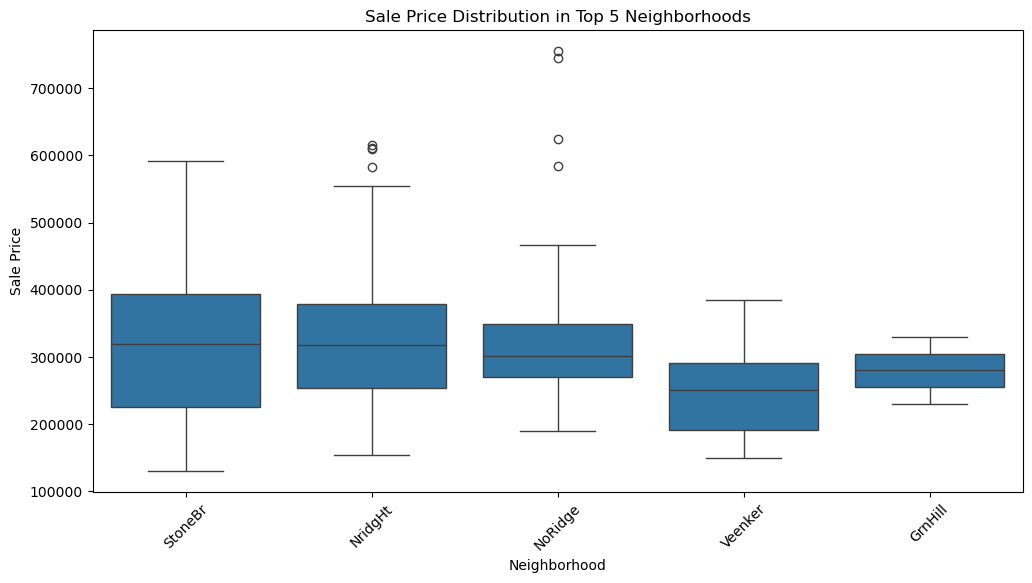

In [83]:
top5_neighborhood = df.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False).head()

plt.figure(figsize=(12, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=df[df["Neighborhood"].isin(top5_neighborhood.index)])
plt.xticks(rotation=45)
plt.title("Sale Price Distribution in Top 5 Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Sale Price")
plt.show()

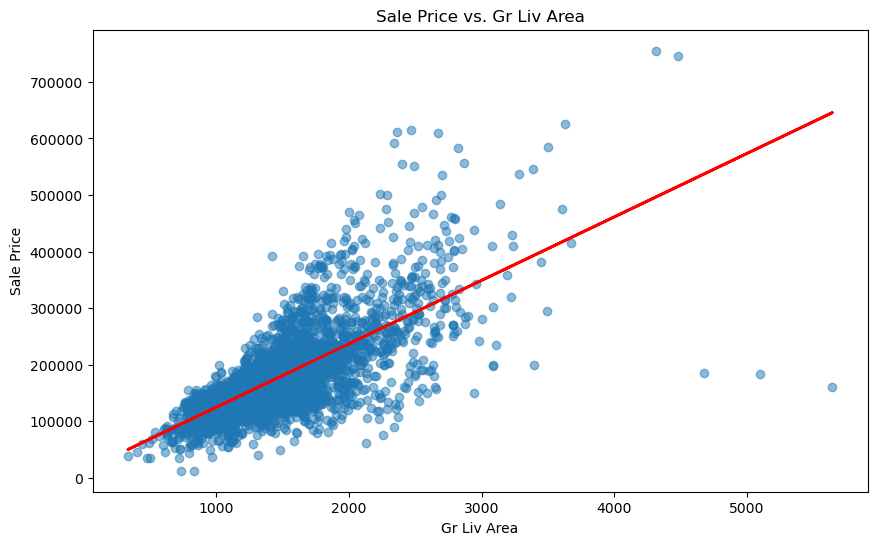

In [87]:
m, b = np.polyfit(df["Gr Liv Area"], df["SalePrice"], 1)

plt.figure(figsize=(10, 6))
plt.scatter(df["Gr Liv Area"], df["SalePrice"], alpha=0.5)
plt.plot(df["Gr Liv Area"], m * df["Gr Liv Area"] + b, color='red', linewidth=2)
plt.title("Sale Price vs. Gr Liv Area")
plt.xlabel("Gr Liv Area")
plt.ylabel("Sale Price")
plt.show()

# Feature Engineering

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder



# Modeling

In [89]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
model_df = df[numeric_cols].copy()

In [91]:
X = model_df.drop(columns=["SalePrice", "PID", "Order"])
y = model_df["SalePrice"]

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [94]:
y_preds = model.predict(X_test)

In [95]:
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = np.sqrt(root_mean_squared_error(y_test, y_preds))
r2 = r2_score(y_test, y_preds)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

RMSE: 202.30
R^2: 0.76


In [102]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     385.3
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:35:37   Log-Likelihood:                -27494.
No. Observations:                2341   AIC:                         5.506e+04
Df Residuals:                    2306   BIC:                         5.526e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.095e+06   9.99e+05     

## Mini Exercises

In [105]:
df[df["Gr Liv Area"] > 2500]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
15,16,527216070,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,...,0,0,210,0,0,6,2010,WD,Normal,538000
46,47,528176010,20,RL,110.0,14300,Pave,Reg,HLS,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,500000
59,60,528328100,60,RL,108.0,14774,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,333168
62,63,528363130,60,RL,98.0,12256,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,325000
65,66,528386040,50,RL,56.0,14720,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737,2738,905427030,75,RL,60.0,19800,Pave,Reg,Lvl,AllPub,...,32,0,0,0,0,12,2006,WD,Normal,415000
2747,2748,906204180,60,RL,88.0,12128,Pave,IR1,Bnk,AllPub,...,0,0,168,0,0,11,2006,WD,Abnorml,209000
2891,2892,916225130,60,RL,42.0,26178,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,335000
2897,2898,916403130,60,RL,68.0,11170,Pave,IR2,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,250000


In [107]:
df["Yr Sold"] = df["Yr Sold"].astype(int)

In [111]:
df[df["Yr Sold"] > 2010]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [112]:
df[(df["Yr Sold"] > 2000) & (df["Overall Qual"] >= 8)]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
6,7,527127150,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,...,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,236500
14,15,527182190,120,RL,68.0,6820,Pave,IR1,Lvl,AllPub,...,0,0,140,0,0,6,2010,WD,Normal,212000
15,16,527216070,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,...,0,0,210,0,0,6,2010,WD,Normal,538000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2895,916326010,20,RL,68.0,16669,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,1,2006,WD,Normal,228000
2899,2900,916475100,20,RL,85.0,14331,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2006,WD,Normal,312500
2900,2901,916477010,20,RL,95.0,13618,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,11,2006,New,Partial,320000
2901,2902,921205030,20,RL,88.0,11443,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,3,2006,New,Partial,369900


In [114]:
df[df["Neighborhood"] == "NridgHt"]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
36,37,528108120,60,RL,102.0,12858,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,1,2010,New,Partial,376162
37,38,528112020,20,RL,98.0,11478,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,306000
38,39,528120060,20,RL,83.0,10159,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2010,New,Partial,395192
39,40,528120090,20,RL,94.0,12883,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,6,2010,New,Partial,290941
40,41,528120100,20,RL,95.0,12182,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2010,New,Partial,220000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,2406,528181030,120,RL,48.0,6955,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2006,New,Partial,202500
2406,2407,528181040,120,RL,40.0,6792,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,New,Partial,202665
2407,2408,528186100,20,RL,61.0,7740,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2006,New,Partial,332200
2408,2409,528186110,120,RL,48.0,6373,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2006,New,Partial,310090


In [115]:
df[df["Neighborhood"] == "StoneBr"].sort_values(by="SalePrice", ascending=False).head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1637,1638,527216080,20,RL,52.0,51974,Pave,IR1,Lvl,AllPub,...,0,0,322,0,0,6,2007,New,Partial,591587
2332,2333,527212030,60,RL,85.0,16056,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,7,2006,New,Partial,556581
2330,2331,527210040,60,RL,60.0,18062,Pave,IR1,HLS,AllPub,...,0,0,0,0,0,9,2006,New,Partial,545224
15,16,527216070,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,...,0,0,210,0,0,6,2010,WD,Normal,538000
2334,2335,527214060,60,RL,82.0,16052,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,7,2006,New,Partial,535000


In [116]:
df[df["Lot Frontage"].isna()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [117]:
df["is_expensive"] = df["SalePrice"] > 300000